In [1]:
#https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

import csv
import pandas as pd 
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.preprocessing import text

import gensim 
from gensim.models import Word2Vec

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/sije/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
df = pd.read_csv("/home/sije/Thesis/DRC_topics.csv", delimiter = ';')

df = df[df['event.message'].notnull()]
def get_length(message):
    """
    """
    message_size = len(message)
    return int(message_size)

convert_string = {'anger': 4, 'disgust': 1, 'fear': 7, 'happiness': 6,'neutral': 3,'sadness': 5,'surprise': 2}

def get_integer_emotion(emotion):
    """
    """
    new_integer = convert_string[emotion] 
    return int(new_integer)

df['size_message'] = df['event.message'].apply(get_length)
df['emotion_integer'] = df['event.emotion'].apply(get_integer_emotion)
df = df[df['size_message'] > 3]


/home/sije/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['event.emotion'].value_counts()

neutral      210808
surprise      61686
happiness     48572
fear           9332
sadness        5409
anger          4291
disgust        3716
Name: event.emotion, dtype: int64

In [4]:
documents = []

from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
def get_stemming(sen):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(sen))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.stem(word) for word in document]
    document = ' '.join(document)

    return(document)

In [5]:
df['message_stemmer'] = df['event.message'].apply(get_stemming)

KeyboardInterrupt: 

In [13]:
df_emo = pd.read_csv("/home/sije/Thesis/French_goldstandard.csv", delimiter = ',', error_bad_lines=False)

df_emo["word_french_stem"] = df_emo["word_french"].apply(get_stemming)

df_emo.to_csv('French_goldstandard2.csv')

In [177]:
import csv
df = df[0:200000]
def get_score(word_list):
    split_words = word_list.split(' ')
    for word in split_words:
        #print(word)
        with open('French_goldstandard2.csv') as csvfile:
            csv_values = csv.reader(csvfile)
            for row in csv_values:
                disgust = 0
                surprise = 0
                neutral = 0
                anger = 0
                sad = 0
                happy = 0
                fear = 0 
                if str(row[11]) == str(word):
                    disgust += float(row[3])
                    surprise += float(row[4])
                    neutral += float(row[5])
                    anger += float(row[6])
                    sad += float(row[7])
                    happy += float(row[8])
                    try:
                        fear += float(row[9])  
                    except ValueError:
                        fear += 0
                    scores = [disgust,surprise,neutral,anger,sad,happy,fear]
                    scores.append(scores.index(max(scores)))
                    return(scores)
    
    
                    


df['message_score'] = df['message_stemmer'].apply(get_score)
df.to_csv('DRC_topics_scores.csv',sep = ';')

In [ ]:
df_scores = pd.read_csv("/home/sije/Thesis/DRC_topics_scores.csv", delimiter = ';')

df_scores = df_scores[df_scores.message_score.notnull()]
print(len(df_scores))
def get_class(score_list):
    scores = score_list.split(',')
    #print(scores)
    return(float(scores[7].replace(']','')) + 1)

df_scores['message_class'] = df_scores['message_score'].apply(get_class)    


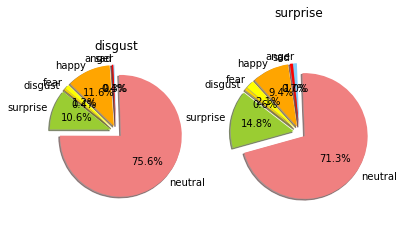

In [4]:
import matplotlib.pyplot as plt
#df_scores['message_class'].value_counts()
df1 = df_scores.loc[df_scores['message_class'] == 3]
#print(df1['emotion_integer'].value_counts())



# Data to plot
labels = 'disgust','surprise','neutral','anger','sad','happy','fear'
#labels = df1['emotion_integer'].value_counts()
#sizes = (1, 1, 1, 1, 1, 1, 1)
sizes = df1['emotion_integer'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange', 'yellow']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

#disgust,surprise,neutral,anger,sad,happy

# Plot
sizes = df_scores.loc[df_scores['message_class'] == 1]['emotion_integer'].value_counts(sort=False)
plt.subplot(1, 2, 1)
plt.title('disgust')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

# Plot
sizes = df_scores.loc[df_scores['message_class'] == 2]['emotion_integer'].value_counts(sort=False)
plt.subplot(1, 2, 2)
plt.title('surprise')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.show()
#df1 = df_scores['message_class'] == 1
#df11 = df[df1]

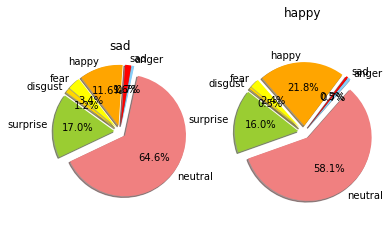

In [5]:
# Data to plot
labels = 'disgust','surprise','neutral','anger','sad','happy','fear'
#labels = df1['emotion_integer'].value_counts()
#sizes = (1, 1, 1, 1, 1, 1, 1)
sizes = df1['emotion_integer'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange', 'yellow']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
sizes = df_scores.loc[df_scores['message_class'] == 5]['emotion_integer'].value_counts(sort=False)
plt.subplot(1, 2, 1)
plt.title('sad')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

# Plot
sizes = df_scores.loc[df_scores['message_class'] == 6]['emotion_integer'].value_counts(sort=False)
plt.subplot(1, 2, 2)
plt.title('happy')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

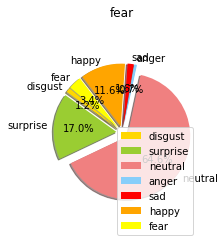

In [6]:
# Data to plot
labels = 'disgust','surprise','neutral','anger','sad','happy','fear'
#labels = df1['emotion_integer'].value_counts()
#sizes = (1, 1, 1, 1, 1, 1, 1)
sizes = df1['emotion_integer'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange', 'yellow']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
sizes = df_scores.loc[df_scores['message_class'] == 5]['emotion_integer'].value_counts(sort=False)
plt.subplot(1, 2, 1)
plt.title('fear')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.legend(labels, loc="best")
plt.show()

In [ ]:
print(df_scores['message_class'].value_counts())

In [ ]:
df1 = df['message_class'] == 1
df11 = df[df1][0:600]

df2 = df['message_class'] == 2
df22 = df[df2][0:600]

df3 = df['message_class'] == 3
df33 = df[df3][0:600]

df4 = df['message_class'] == 4
df44 = df[df4][0:600]

df5 = df['message_class'] == 5
df55 = df[df5][0:600]

df6 = df['message_class'] == 6
df66 = df[df6][0:600]

df7 = df['message_class'] == 7
df77 = df[df7][0:600]

frames = [df11, df22, df33, df44, df55, df66, df77]
df = pd.concat(frames)

In [21]:
print(len(df))

3590


In [10]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(df['message_stemmer'], df['message_class'])

KeyError: 'message_stemmer'

In [24]:
print(len(X_train))

2692


In [25]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [26]:
# create a count vectorizer object 
#count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect = CountVectorizer()
count_vect.fit(df['message_stemmer'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train.apply(lambda x: np.str_(x)))
xvalid_count =  count_vect.transform(X_test.apply(lambda x: np.str_(x)))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['message_stemmer'])
xtrain_tfidf =  tfidf_vect.transform(X_train.apply(lambda x: np.str_(x)))
xvalid_tfidf =  tfidf_vect.transform(X_test.apply(lambda x: np.str_(x)))

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['message_stemmer'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train.apply(lambda x: np.str_(x)))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_test.apply(lambda x: np.str_(x)))

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['message_stemmer'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train.apply(lambda x: np.str_(x)))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test.apply(lambda x: np.str_(x)))


In [28]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  
    print(accuracy_score(y_test,predictions))
    #return metrics.accuracy_score(predictions, y_test)

In [19]:
# Naive Bayes on Count Vectors
print("NB, Count Vectors: ")
train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xvalid_count)


# Naive Bayes on Word Level TF IDF Vectors
print("NB, WordLevel TF-IDF: ")
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)

# Naive Bayes on Ngram Level TF IDF Vectors
print("NB, N-Gram Vectors: ")
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram)


# Naive Bayes on Character Level TF IDF Vectors
print("NB, CharLevel Vectors: ")
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars)

NB, Count Vectors: 
[[   0   67    0    6    2    9    0]
 [   1 3781    0  263   59  180   12]
 [   0   41    0    5    0    9    0]
 [   1 1060    1  988   30   76    9]
 [   0  901    0   85  299   66    3]
 [   0  887    0  113   34  539    5]
 [   0  484    0   75   15   65  114]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.52      0.88      0.66      4296
           2       0.00      0.00      0.00        55
           3       0.64      0.46      0.53      2165
           4       0.68      0.22      0.33      1354
           5       0.57      0.34      0.43      1578
           6       0.80      0.15      0.25       753

   micro avg       0.56      0.56      0.56     10285
   macro avg       0.46      0.29      0.32     10285
weighted avg       0.59      0.56      0.51     10285

0.5562469615945552
NB, WordLevel TF-IDF: 
[[   0   73    0    6    0    5    0]
 [   0 4152    0   73    4   67    0

/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
# Linear Classifier on Count Vectors
print("LR, Count Vectors: ")
train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xvalid_count)


# Linear Classifier on Word Level TF IDF Vectors
print("LR, WordLevel TF-IDF: ")
train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xvalid_tfidf)


# Linear Classifier on Ngram Level TF IDF Vectors
print("LR, N-Gram Vectors: ")
train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram)


# Linear Classifier on Character Level TF IDF Vectors
print("LR, CharLevel Vectors: ")
train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars)


LR, Count Vectors: 


/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[  25   32    0   12    9    6    2]
 [   5 3574    5  276  216  222   82]
 [   0   20   33    4    0    5    5]
 [   5  477    2 1370   97   91   34]
 [   3  319    5   85  821   77   32]
 [   3  466    3  123   88  928   35]
 [   1  162    1   58   33   29  404]]
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        86
           1       0.71      0.82      0.76      4380
           2       0.67      0.49      0.57        67
           3       0.71      0.66      0.68      2076
           4       0.65      0.61      0.63      1342
           5       0.68      0.56      0.62      1646
           6       0.68      0.59      0.63       688

   micro avg       0.70      0.70      0.70     10285
   macro avg       0.67      0.57      0.61     10285
weighted avg       0.69      0.70      0.69     10285

0.6956733106465727
LR, WordLevel TF-IDF: 
[[   9   54    0    4   12    6    1]
 [   1 3846    0  188  166  144   35]
 [   0   26   24  

In [24]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: " + str(accuracy))

/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[   0   86    0    0    0    0    0]
 [   0 4379    0    0    0    0    0]
 [   0   67    0    0    0    0    0]
 [   0 2142    0    0    0    0    0]
 [   0 1315    0    0    0    0    0]
 [   0 1581    0    0    0    0    0]
 [   0  715    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.43      1.00      0.60      4379
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00      2142
           4       0.00      0.00      0.00      1315
           5       0.00      0.00      0.00      1581
           6       0.00      0.00      0.00       715

   micro avg       0.43      0.43      0.43     10285
   macro avg       0.06      0.14      0.09     10285
weighted avg       0.18      0.43      0.25     10285

0.42576567817209526
SVM, N-Gram Vectors: None


In [25]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, y_train, xvalid_count)
print("RF, Count Vectors: " + str(accuracy))

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, y_train, xvalid_tfidf)
print("RF, WordLevel TF-IDF: " + str(accuracy))

/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[  15   43    0   12    8    8    0]
 [   6 3925    0  190  137   96   25]
 [   0   34   19    5    3    6    0]
 [   0  801    0 1159   90   77   15]
 [   0  515    0   82  679   33    6]
 [   2  646    0  138   90  691   14]
 [   0  326    0   81   35   43  230]]
              precision    recall  f1-score   support

           0       0.65      0.17      0.28        86
           1       0.62      0.90      0.74      4379
           2       1.00      0.28      0.44        67
           3       0.70      0.54      0.61      2142
           4       0.65      0.52      0.58      1315
           5       0.72      0.44      0.55      1581
           6       0.79      0.32      0.46       715

   micro avg       0.65      0.65      0.65     10285
   macro avg       0.73      0.45      0.52     10285
weighted avg       0.67      0.65      0.63     10285

0.653184248906174
RF, Count Vectors: None


/home/sije/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[  21   43    0   13    6    3    0]
 [   2 3959    1  182  113   91   31]
 [   0   23   32    5    3    3    1]
 [   0  564    0 1450   53   59   16]
 [   0  510    0   96  653   50    6]
 [   0  463    1  101   50  952   14]
 [   0  275    1   66   50   43  280]]
              precision    recall  f1-score   support

           0       0.91      0.24      0.39        86
           1       0.68      0.90      0.78      4379
           2       0.91      0.48      0.63        67
           3       0.76      0.68      0.72      2142
           4       0.70      0.50      0.58      1315
           5       0.79      0.60      0.68      1581
           6       0.80      0.39      0.53       715

   micro avg       0.71      0.71      0.71     10285
   macro avg       0.79      0.54      0.61     10285
weighted avg       0.73      0.71      0.70     10285

0.7143412736995625
RF, WordLevel TF-IDF: None


In [41]:
selected_messages = df['message_stemmer'][0:24000]
print(df['message_stemmer'][0:2])
model = gensim.models.Word2Vec(selected_messages)
model.score_sentence_cbow('president')



# fit a 2d PCA model to the vectors
#X = model[model.wv.vocab]


# load the pre-trained word-embedding vectors 
embeddings_index = {}
for line in X:
    values = line
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

    
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(df['message_stemmer'])
word_index = token.word_index


# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

562          qu il le fass ça ser mieux
563    president félix dit que la vérit
Name: message_stemmer, dtype: object


AttributeError: 'Word2Vec' object has no attribute 'score_sentence_cbow'

In [16]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

In [17]:
classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
#classifier = create_model_architecture(xtrain_tfidf_ngram)
accuracy = train_model(classifier, xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram, is_neural_net=True)
print("NN, Ngram Level TF IDF Vectors" +str(accuracy))

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'train_model' is not defined

In [20]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings" + str(accuracy))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


NameError: name 'train_model' is not defined

In [2]:
from py_translator import Translator

def french_translation(word):
    s = Translator().translate(text=word,dest='fr').text

    return(s)

In [7]:
from translate import Translator
def french_translation(word):
    translator= Translator(to_lang="French")
    translation = translator.translate(word)
    print(translation)
    return(translation)

In [9]:
french_translation("cat")

'le chat'

In [12]:

df_emo = pd.read_csv("/home/sije/Thesis/Andbrain_DataSet.csv", delimiter = ',', error_bad_lines=False)
#print(df_emo.head())

df_emo["word_french"] = df_emo["word"].apply(french_translation)

df_emo.to_csv('French_goldstandard.csv')

compétence
capable
agression
Académies
Accepter
acceptance
comptabilité
exactitude
réaliser
Curage à l&apos;acide
actives
activités
ajouter
Adresses
administrateur
adobe
adulte
adultes
avancé
de l'avantage
aventure
publicité
du business
âge
d’accord
se sont mis
avance
sida
but
Alabama
Alaska
alert
autoriser
amateur
Amazing!!
amendement
Américains
montants
anal
analyse
andrew
animé
ANN
annoncée
anonyme
réponse
AP
appartements
appartements
voie de recours
apparaît.
applicable
homologation
approuvé
environ
ar
Domaines
bras
armée
environnementaux
ASSEMBLAGE
actifs
assister
assistant
entreprise associée
Atlanta
atome
piquer
l'attention
Avocats
Austin
autriche
automatique
automatiquement
ave
avenue
éviter
prix
babes
nourrisson
mauvais
sac
Sacs
activité bancaire
banques
.
le base-ball
le basket-ball
basse
une baignoire
batteries
à remplacer
bataille
BBC
BC
plage
ours
battement
magnifique
beauté
est devenu
devient faible
lit
chambre
conduite
croire
avantage
Bêta
meilleur
au-delà
grand
milliard

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 44 MINUTES 29 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 08 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 07 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 44 MINUTES 28 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 07 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 01 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 01 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 01 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 01 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 51 MINUTES 00 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 55 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 55 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 55 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 55 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 54 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 48 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 48 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 48 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 48 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 48 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 31 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 31 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 31 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 31 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 43 MINUTES 52 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 23 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 43 MINUTES 44 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 22 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 22 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 22 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 16 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 43 MINUTES 37 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 16 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 16 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 43 MINUTES 37 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 09 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 08 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 08 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 43 MINUTES 29 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 08 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 03 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 03 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 03 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 02 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  08 HOURS 50 MINUTES 02 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
MYMEMORY WARNING: YOU USE

KeyboardInterrupt: 

In [11]:
df_emo = pd.read_csv("/home/sije/Thesis/Andbrain_DataSet.csv", delimiter = ',', error_bad_lines=False)
df_emo3 = df_emo[500:800]
df_emo3["word_french"] = df_emo3["word"].apply(french_translation)

df_emo3.to_csv('French_goldstandard2.csv')

congés
Hong Kong
espoir
milieu chaud
Ménages
et de haute couture.
Houston
rh
énorme
chasseur
la glace
Icône
idéal
Identifiés
identifier
Quantité
immédiatement
importation
de l'importance
important
améliorer
amélioré
inceste
pouce
pouces
Augmentation
en augmentation
pyxguide
Indiana
secteurs
influer sur
cassure
piles
exemple
immédiat
et de recherche
intégrée
intended
courus
intéressé ?
intéressant
centres d’intérêts
les modules
interview
a initié
intervenant
Iowa
iPod
carence en
israël
émise
problèmes
iv
ROOD
jazz
jésus
joseph
juge
Junior
keep
tige d'entraînement
Kentucky
kept
enfants
genre
New to the website?
kongkmj meld type
Corée
labo
defaut
femmes
dame
le lac
ordinateur
plus grand
en retard
latin
Lois
Avocat
calque
leader
chefs de groupe
leadership
mène
ligue
l'apprentissage
cuir
leave
loi
législation
Sphincter oesophagien inferieur
lesbienne
ou moins
loué
Bibliothèques
Attribution de licence
éclairage
probablement
limite
nombre
lingerie
peu
prêt
connecté
Considéré
Belinda...
la pe

KeyboardInterrupt: 

Guten Morgen!


In [15]:
import csv
with open('/home/sije/Thesis/Andbrain_DataSet.csv', newline='') as f:
  reader = csv.reader(f)
  for row in reader:
    print(row[0])
    

word
ability 
able 
abuse 
academy 
accept 
acceptance 
accounting 
accuracy 
achieve 
acid 
active 
activities 
adding 
addresses 
administrator 
adobe 
adult 
adults 
advanced 
advantage 
adventure 
advertisement 
affairs 
age 
agree 
agreed 
ahead 
aids 
aim 
alabama 
alaska 
alert 
allow 
amateur 
amazing 
amendment 
americans 
amounts 
anal 
analysis 
andrew 
anime 
ann 
announced 
anonymous 
answer 
ap 
apartment 
apartments 
appeal 
appears 
applicable 
approval 
approved 
approximately 
ar 
areas 
arms 
army 
aspects 
assembly 
assets 
assist 
assistant 
associate 
atlanta 
atom 
attack 
attention 
attorney 
austin 
austria 
automatic 
automatically 
ave 
avenue 
avoid 
awards 
babes 
baby 
bad 
bag 
bags 
banking 
banks 
bars 
baseball 
basketball 
bass 
bath 
batteries 
battery 
battle 
bbc 
bc 
beach 
bear 
beat 
beautiful 
beauty 
became 
becomes 
bed 
bedroom 
behavior 
believe 
benefit 
beta 
better 
beyond 
big 
billion 
binding 
bird 
birth 
birthday 
blood 
blow 
boat 

In [6]:
df_emo.head()


,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,1.8646
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038


In [10]:
df = pd.read_csv("/home/sije/Thesis/DRC_topics.csv", delimiter = ';')

df = df[df['event.message'].notnull()]
def get_length(message):
    """
    """
    message_size = len(message)
    return int(message_size)

convert_string = {'anger': 1, 'disgust': 2, 'fear': 3, 'happiness': 4,'neutral': 5,'sadness': 6,'surprise': 7}

def get_integer_emotion(emotion):
    """
    """
    new_integer = convert_string[emotion] 
    return int(new_integer)



print(len(df))
df['size_message'] = df['event.message'].apply(get_length)
df['emotion_integer'] = df['event.emotion'].apply(get_integer_emotion)
df = df[df['size_message'] > 3]

347362


In [53]:
sentence = 'Svp Radio Okapi, dites moi comment laisser une réaction vocale sur votre émission dialogue entre congolais'
x = sentence.split(' ')
for x in sentence:
    if x == df_emo['word_french']:
        print(x)

KeyError: 'word_french'